In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from shutil import copy
from collections import defaultdict
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Function to download and extract the dataset if not already present
def download_dataset():
    kaggle_input_directory = '/kaggle/input/'
    print(os.listdir(kaggle_input_directory))
    if "food-101" in os.listdir():
        print("Dataset already exists")
    else:
        print("Downloading the data...")
        !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
        print("Dataset downloaded!")
        print("Extracting data..")
        !tar xzvf food-101.tar.gz > /dev/null 2>&1
        print("Extraction done!")

In [3]:
# Function to resize all images in the dataset
def resize_images(data_path):
    dirs = os.listdir(data_path)
    try:
        for c in dirs:
            ch_path = os.path.join(data_path, c)
            if os.path.isdir(ch_path) and c != '.DS_Store':
                print(f'Resizing {c} images')
                for f in os.listdir(os.path.join(ch_path, "")):
                    img_path = os.path.join(ch_path, f)
                    if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png'):
                        img = cv2.imread(img_path)
                        imgRescale = cv2.resize(img, (255, 255))
                        output_path_rescaled = os.path.join(ch_path,f'{os.path.splitext(f)[0]}.jpg')
                        cv2.imwrite(output_path_rescaled, imgRescale)
    except Exception as error:
        print(f"An error has occurred: {error}")

In [4]:
# Function to prepare train and test data
def prepare_data(filepath, src, dest):
    classes_images = defaultdict(list)
    with open(filepath, 'r') as txt:
        paths = [read.strip() for read in txt.readlines()]
        for p in paths:
            food = p.split('/')
            classes_images[food[0]].append(food[1] + '.jpg')

    for food in classes_images.keys():
        print("\nCopying images into",food)
        if not os.path.exists(os.path.join(dest,food)):
            os.makedirs(os.path.join(dest,food))
        for i in classes_images[food]:
            copy(os.path.join(src,food,i), os.path.join(dest,food,i))
    print("Copying Done!")

In [12]:
# Function to build and train the CNN model
def build_and_train_model(train_generator, test_generator, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])
    
    history = model.fit(
        train_generator,
        epochs=50,
        verbose=1,
        validation_data=test_generator,
    )

    return history  # Return the history object for potential further analysis


In [14]:
# Main function
def main():
    download_dataset()

In [15]:
    data_path = '/kaggle/input/food-101/food-101/food-101/images'
    train_file_path = '/kaggle/input/food-101/food-101/food-101/meta/train.txt'
    test_file_path = '/kaggle/input/food-101/food-101/food-101/meta/test.txt'
    train_data_dir = 'train'
    test_data_dir = 'test'

In [16]:
    # Resize images
    resize_images(data_path)

Resizing macarons images
Resizing french_toast images
Resizing lobster_bisque images
Resizing prime_rib images
Resizing pork_chop images
Resizing guacamole images
Resizing baby_back_ribs images
Resizing mussels images
Resizing beef_carpaccio images
Resizing poutine images
Resizing hot_and_sour_soup images
Resizing seaweed_salad images
Resizing foie_gras images
Resizing dumplings images
Resizing peking_duck images
Resizing takoyaki images
Resizing bibimbap images
Resizing falafel images
Resizing pulled_pork_sandwich images
Resizing lobster_roll_sandwich images
Resizing carrot_cake images
Resizing beet_salad images
Resizing panna_cotta images
Resizing donuts images
Resizing red_velvet_cake images
Resizing grilled_cheese_sandwich images
Resizing cannoli images
Resizing spring_rolls images
Resizing shrimp_and_grits images
Resizing clam_chowder images
Resizing omelette images
Resizing fried_calamari images
Resizing caprese_salad images
Resizing oysters images
Resizing scallops images
Resizi

In [22]:
# Prepare train and test data
print("Creating train data...")
prepare_data(train_file_path, data_path, train_data_dir)
print("Creating test data...")
prepare_data(test_file_path, data_path, test_data_dir)

Creating train data...

Copying images into apple_pie

Copying images into baby_back_ribs

Copying images into baklava

Copying images into beef_carpaccio

Copying images into beef_tartare

Copying images into beet_salad

Copying images into beignets

Copying images into bibimbap

Copying images into bread_pudding

Copying images into breakfast_burrito

Copying images into bruschetta

Copying images into caesar_salad

Copying images into cannoli

Copying images into caprese_salad

Copying images into carrot_cake

Copying images into ceviche

Copying images into cheesecake

Copying images into cheese_plate

Copying images into chicken_curry

Copying images into chicken_quesadilla

Copying images into chicken_wings

Copying images into chocolate_cake

Copying images into chocolate_mousse

Copying images into churros

Copying images into clam_chowder

Copying images into club_sandwich

Copying images into crab_cakes

Copying images into creme_brulee

Copying images into croque_madame

Cop

In [24]:
   # Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(255, 255),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
    )

Found 75750 images belonging to 101 classes.


In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(255, 255),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
    )

Found 25250 images belonging to 101 classes.


In [26]:
# Build and train the CNN model
history = build_and_train_model(train_generator, test_generator, num_classes=101)


Epoch 1/50
2368/2368 [==============================] - 287s 119ms/step - loss: 4.6221 - accuracy: 0.0087 - val_loss: 4.6152 - val_accuracy: 0.0099
Epoch 2/50
2368/2368 [==============================] - 277s 117ms/step - loss: 4.6159 - accuracy: 0.0086 - val_loss: 4.6152 - val_accuracy: 0.0101
Epoch 3/50
2368/2368 [==============================] - 279s 118ms/step - loss: 4.6161 - accuracy: 0.0099 - val_loss: 4.6148 - val_accuracy: 0.0110
Epoch 4/50
2368/2368 [==============================] - 290s 122ms/step - loss: 4.5228 - accuracy: 0.0240 - val_loss: 4.4075 - val_accuracy: 0.0374
Epoch 5/50
2368/2368 [==============================] - 280s 118ms/step - loss: 4.3486 - accuracy: 0.0477 - val_loss: 4.1543 - val_accuracy: 0.0761
Epoch 6/50
2368/2368 [==============================] - 277s 117ms/step - loss: 4.0807 - accuracy: 0.0839 - val_loss: 3.9545 - val_accuracy: 0.1034
Epoch 7/50
2368/2368 [==============================] - 272s 115ms/step - loss: 3.8070 - accuracy: 0.1241 - val_

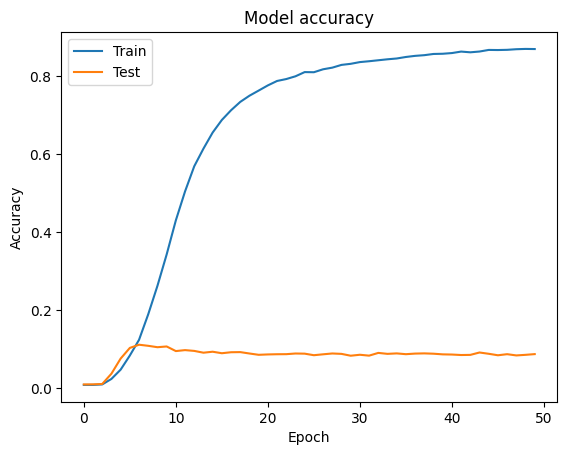

In [28]:
# Plotting training & test accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

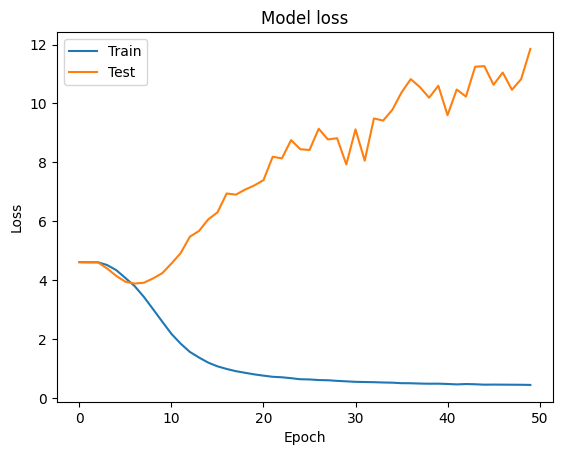

In [30]:
# Plotting training & test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
if __name__ == "__main__":
    main()

['test-image', 'food-101']
--2024-03-16 14:05:39--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2024-03-16 14:05:39--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: 'food-101.tar.gz'

food-101.tar.gz     100%[===================>]   4.65G  31.9MB/s    in 2m 42s  

2024-03-16 14:08:22 (29.5 MB/s) - 'food-101.tar.gz' saved [4996278331/4996278331]

Dataset downloaded!
Extracting data..
Extraction done!
